#We'll use data science to predict steel fatigue strength based on its composition and processing, helping engineers build stronger, longer-lasting structures.








#What is Fatigue strength and why it is important?

###Think of fatigue strength as the endurance of a material like steel when it's repeatedly stressed. Imagine bending a paperclip back and forth until it breaks. Steel works a bit like that too, but on a much larger scale.
###When we use steel in things like buildings, bridges, or even in tools and machines, it's constantly dealing with forces—like being pushed, pulled, or twisted. Fatigue strength tells us how much of this back-and-forth stress it can handle before it gives out.
###For someone without mechanical knowledge, it's like knowing how many times you can bend a piece of wire before it snaps. Engineers use this information to make sure that the stuff we build lasts a long time and stays safe to use, even with all the pushing and pulling it goes through in its lifetime.

#Role of chemical composition and Heat treatment methods In steel manufacturing.

###Imagine you're baking a cake. The ingredients you choose and how you bake it can determine how moist and delicious it turns out. Similarly, the "recipe" for making steel involves selecting the right elements and applying heat treatments, which are like baking methods, to get the desired properties.
###So, just like a chef adjusts ingredients and cooking techniques to make the perfect cake, engineers tweak the chemical composition and heat treatment of steel to get the right balance of strength and durability. This ensures that the steel can handle the ups and downs of stress without crumbling, just like a well-baked cake holds together beautifully when sliced.

#About the Dataset

#####This dataset contains 25 experimental features, including:

#####Chemical composition - %C, %Si, %Mn, %P, %S, %Ni, %Cr, %Cu, %Mo (all in wt. %)
#####Upstream processing details - ingot size, reduction ratio, non-metallic inclusions
#####Heat treatment conditions - temperature, time and other process conditions for normalizing, through-hardening, carburizing-quenching and tempering processes
#####For mechanical properties, we'll consider Yield Strength (YS), Ultimate Tensile Strength (UTS), Percentage of Elongation (%EL), Percentage of Reduction in Area (%RA), hardness, Charpy impact value (J/cm2), and fatigue strength.

######C	% Carbon
######Si	% Silicon
######Mn	% Manganese
######P	% Phosphorus
######S	% Sulphur
######Ni	% Nickel
######Cr	% Chromium
######Cu	% Copper
######Mo	% Molybdenum
######NT	Normalizing Temperature
######THT	Through Hardening Temperature
######THt	Through Hardening Time
######THQCr	Cooling Rate for Through Hardening
######CT	Carburization Temperature
######Ct	Carburization Time
######DT	Diffusion Temperature
######Dt	Diffusion time
######QmT	Quenching Media Temperature (for Carburization)
######TT	Tempering Temperature
######Tt	Tempering Time
######TCr	Cooling Rate for Tempering
######RedRatio	Reduction Ratio (Ingot to Bar)
######dA	Area Proportion of Inclusions Deformed by Plastic Work
######dB	Area Proportion of Inclusions Occurring in Discontinuous Array
######dC	Area Proportion of Isolated Inclusions
######Fatigue	Rotating Bending Fatigue Strength (10^7 Cycles)



#Importing the referances and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA,MiniBatchSparsePCA
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor


#Importing the dataset.

In [2]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [3]:
df=pd.read_csv("data.csv")

#Exploratory Data Analysis & Data Cleaning.

In [4]:
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [5]:
#Dropping out the SL.No column as of no use.
df=df.drop('Sl. No.',axis=1)

In [6]:
#Getting the shape of DataSet.
df.shape

(437, 26)

In [7]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

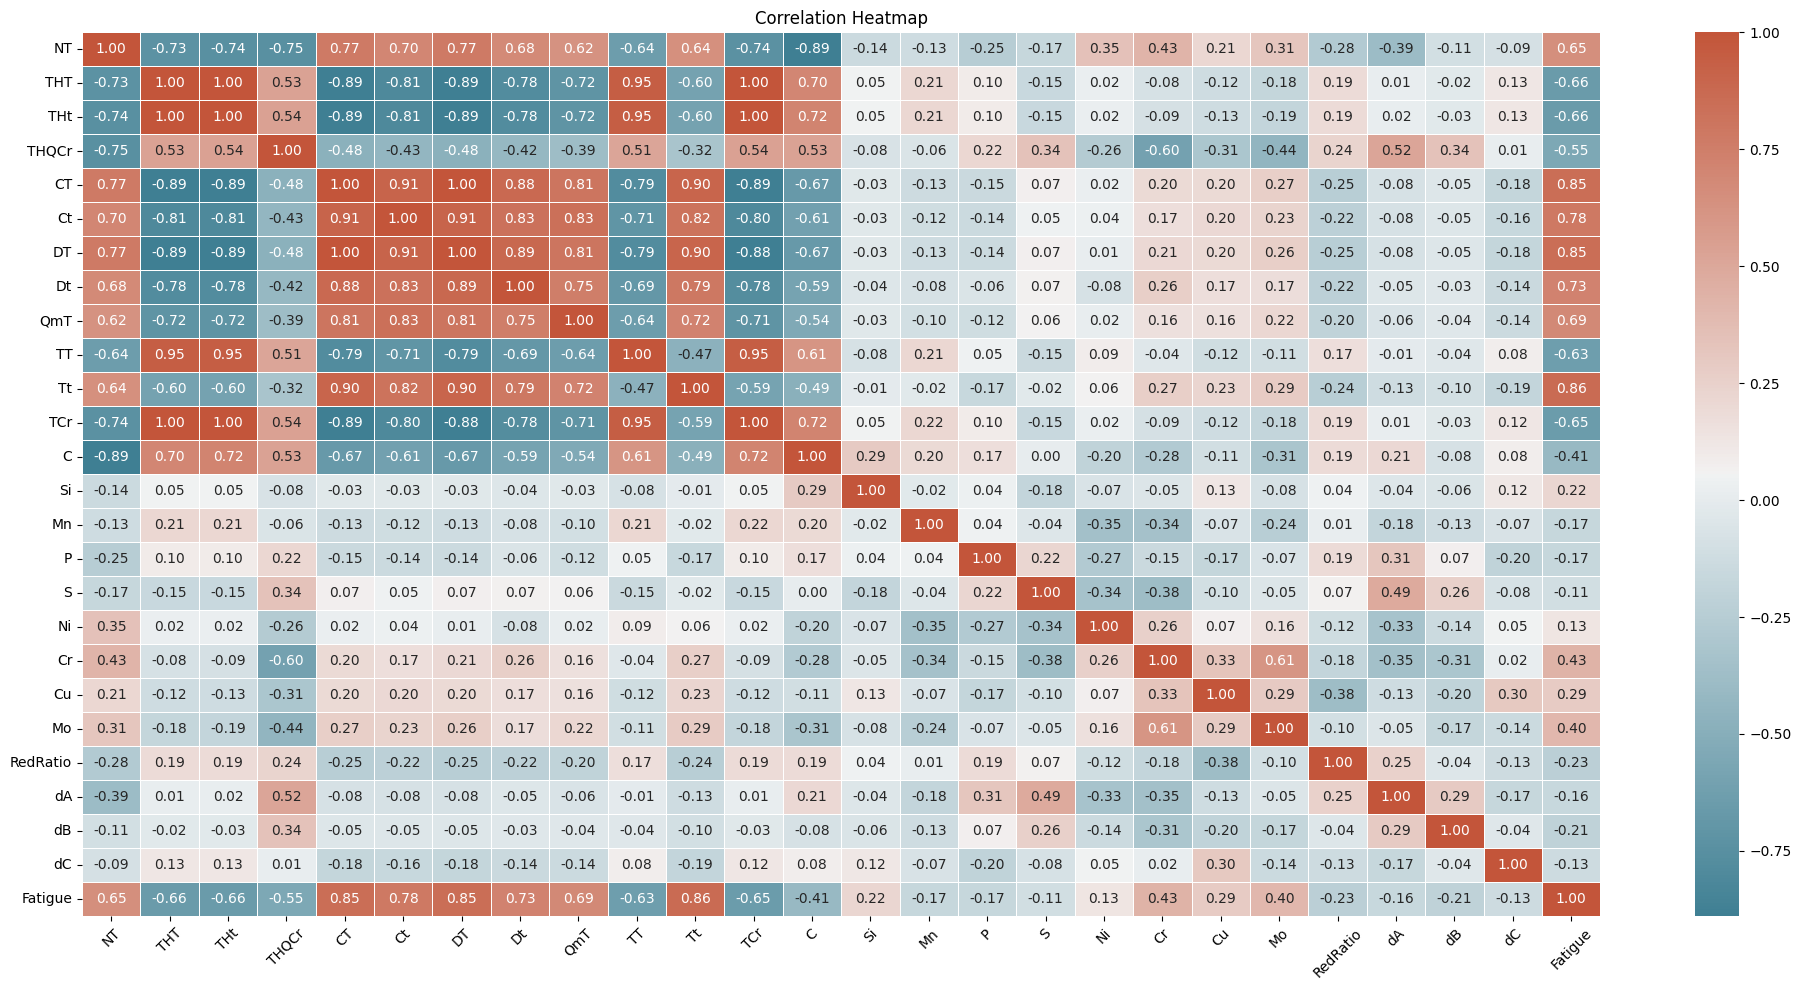

In [8]:
correlation = df.corr()
plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
#Looking for any null value
df.isnull().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [10]:
#Looking for duplicated row
df.duplicated().sum()

0

In [11]:
#Descriptive statics analysis
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


#Will go through with every possible method to know the distribution of data.


The distribution of data refers to the pattern or arrangement of values within a dataset. It provides information about how frequently different values occur and the spread or variability of the data. Understanding the distribution of data is important for several reasons:

Summary and Description: Knowing the distribution allows researchers and analysts to summarize and describe the dataset effectively. It provides insights into central tendencies (such as mean, median, and mode) and dispersion (such as variance and standard deviation), which are essential for understanding the overall characteristics of the data.

Inference and Hypothesis Testing: The distribution of data influences the choice of statistical methods and tests used for inference and hypothesis testing. Different statistical tests assume specific distributions (e.g., normal distribution for t-tests and ANOVA). By knowing the distribution, analysts can select appropriate tests and make valid statistical inferences.

Modeling and Prediction: In many data analysis tasks, such as regression analysis or machine learning, understanding the distribution of the target variable and predictors is crucial for building accurate models and making reliable predictions. Models often assume certain distributions for the data, and deviations from these assumptions can affect model performance.

Detection of Anomalies and Outliers: Unusual patterns or outliers in the distribution of data may indicate errors, anomalies, or interesting phenomena. Detecting and understanding these anomalies is essential for quality control, anomaly detection, and identifying potential areas for further investigation.

Decision Making: In business and decision-making contexts, knowing the distribution of key metrics and variables helps stakeholders make informed decisions. For example, understanding the distribution of sales revenue can inform sales forecasts, budget allocations, and resource planning.

The effects of not knowing the distribution of data can be significant:

Misinterpretation of Results: Incorrect assumptions about the distribution of data can lead to biased estimates, inaccurate conclusions, and misinterpretation of results. This can undermine the validity and reliability of analyses and decision-making processes.

Inappropriate Statistical Methods: Using statistical methods or tests that are not suitable for the data distribution can produce misleading or erroneous results. For example, applying parametric tests to non-normally distributed data may yield incorrect p-values and conclusions.

Reduced Predictive Accuracy: Ignoring the distribution of data when building predictive models can result in poor model performance and inaccurate predictions. Models may fail to capture important patterns or relationships present in the data, leading to suboptimal decision-making.

In summary, understanding the distribution of data is essential for accurate analysis, inference, modeling, and decision-making. It enables researchers, analysts, and stakeholders to draw meaningful insights, make reliable predictions, and take informed actions based on the data.

##There are several ways to understand the distribution of data:

###Histograms: Histograms display the frequency distribution of a continuous variable by dividing the data into bins and plotting the number of observations in each bin.

###Density Plots: Density plots estimate the probability density function of a continuous variable, providing a smoother representation of the distribution compared to histograms.

###Box Plots: Box plots summarize the distribution of a continuous variable by displaying its median, quartiles, and potential outliers.

###QQ Plots: Quantile-Quantile plots compare the quantiles of the observed data with the quantiles of a theoretical distribution, such as the normal distribution, to assess if they follow a similar pattern.

###Kernel Density Estimation (KDE): KDE is a non-parametric method for estimating the probability density function of a continuous variable, often used to visualize the distribution of data.

###Empirical Cumulative Distribution Function (ECDF): ECDF plots the cumulative distribution of the data, providing insights into the proportion of observations below a certain value.

###Violin Plots: Violin plots combine elements of box plots and KDE to visualize the distribution of a continuous variable, providing information about both central tendency and variability.

###Frequency Tables: Frequency tables summarize the distribution of categorical variables by displaying the frequency or proportion of each category.

###Bar Plots: Bar plots represent the frequency or proportion of categories in a categorical variable using bars of equal width.

###Pie Charts: Pie charts display the proportion of each category in a categorical variable as slices of a circle, providing a visual representation of the distribution.

#Method-1 Histograms.

In [26]:
def plot_histograms(data):
    # Get numerical columns from the DataFrame
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Set up the matplotlib figure with the appropriate number of subplots
    num_plots = len(numerical_cols)
    num_cols = 3  # Number of columns per row in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Loop through each numerical column and plot a histogram
    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        sns.histplot(data[col], ax=ax, kde=True)  # Plot histogram with kernel density estimate
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

        # Calculate skewness
        skewness = data[col].skew()
        skew_label = 'Positive' if skewness > 0 else 'Negative' if skewness < 0 else 'Symmetric'

        # Add skewness information as text annotation
        ax.text(0.05, 0.9, f'Skewness: {skew_label} ({skewness:.2f})', transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

        # Add median line
        median_value = data[col].median()
        ax.axvline(median_value, color='r', linestyle='--', linewidth=1)

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

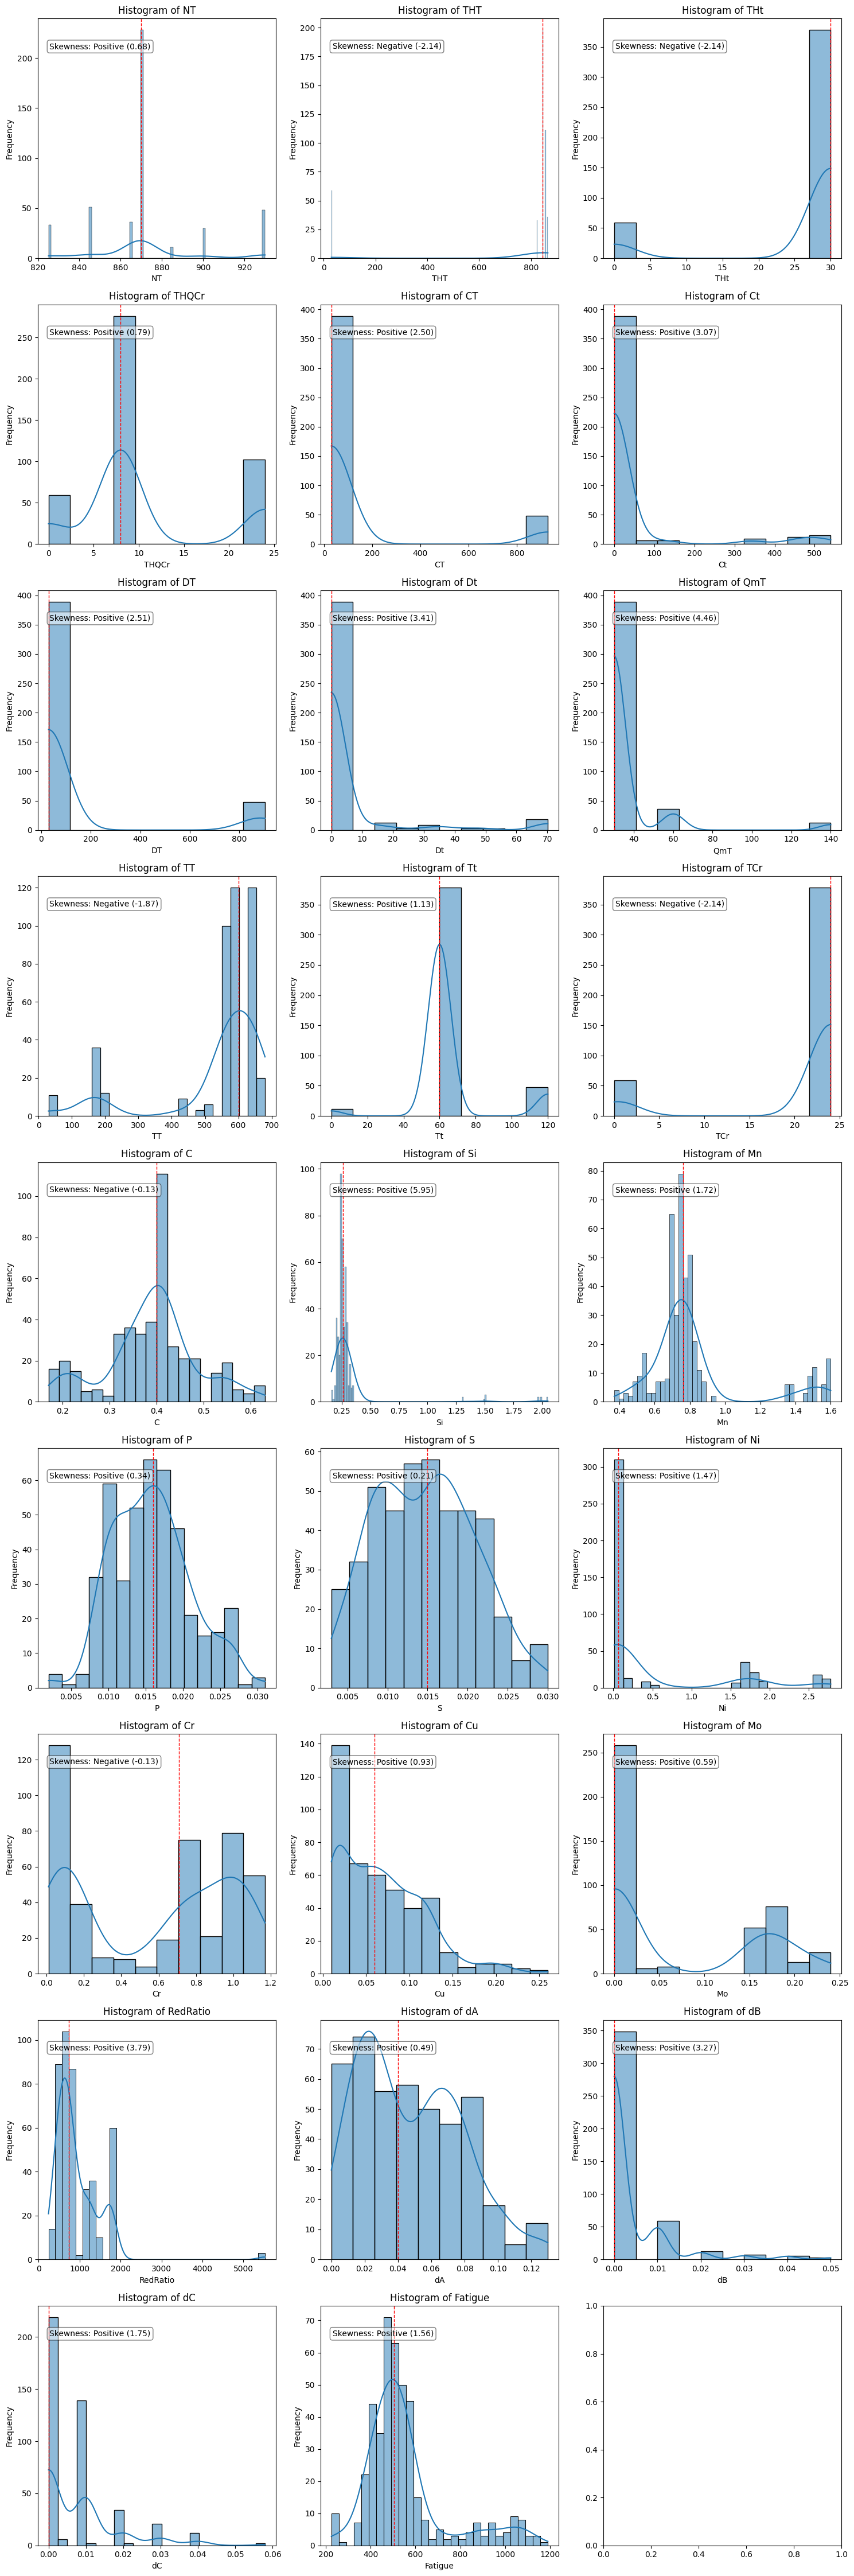

In [27]:
plot_histograms(df)

#Method-2 Box Plot

In [14]:
def plot_boxplots(data):
    # Get numerical columns from the DataFrame
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Set up the matplotlib figure with the appropriate number of subplots
    num_plots = len(numerical_cols)
    num_cols = 3  # Number of columns per row in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2.5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Loop through each numerical column and plot a box plot
    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        sns.boxplot(x=data[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')
        ax.set_xlabel(col)

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

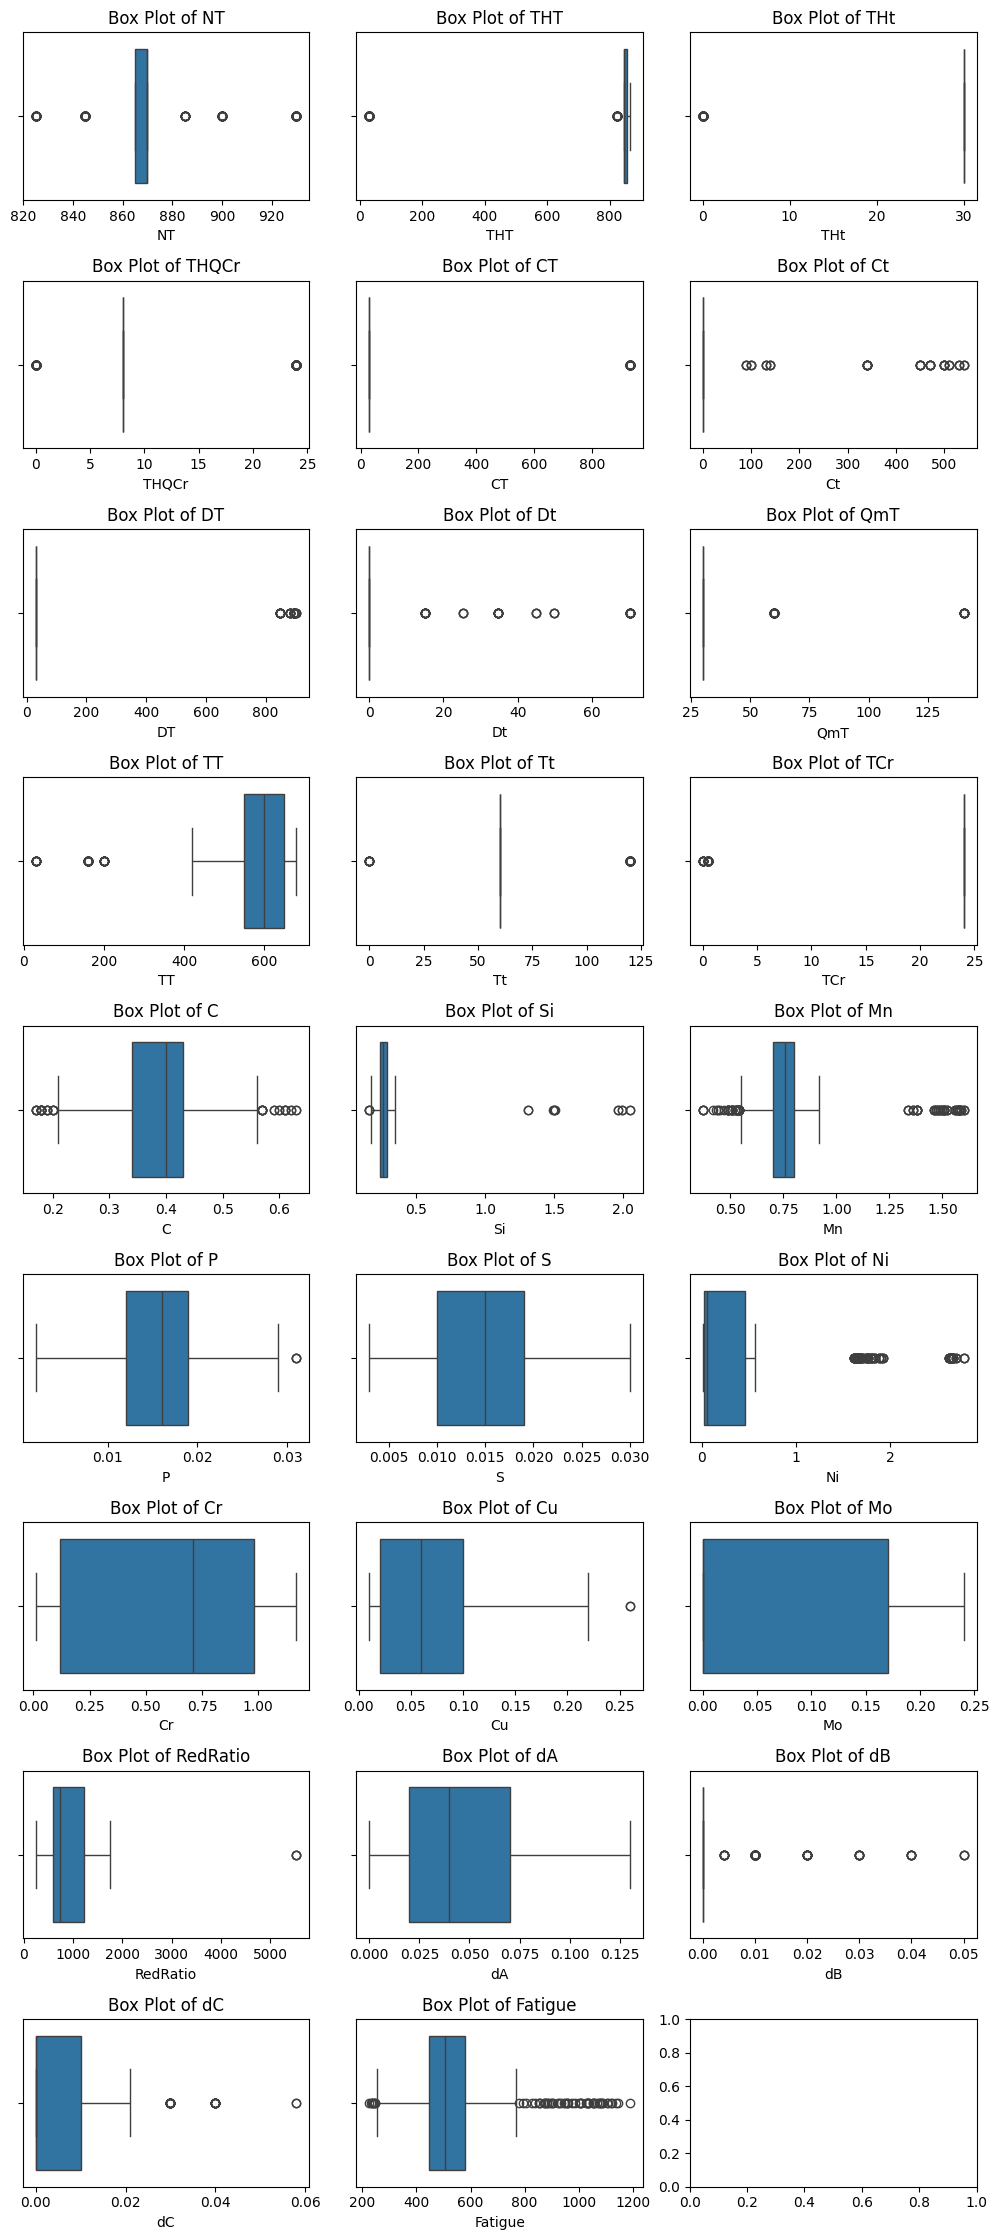

In [15]:
plot_boxplots(df)

#Method-3 Pie chart
###But this method is aplicable when we have categorical variables as of now we do not have any categorical variable.

#Checking the distribution of our data with stastical tests

#Shapiro Wilk Test

In [16]:
from scipy.stats import shapiro

def shapiro_test(data, alpha=0.05):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)

    # Print the test result
    print("Shapiro-Wilk Test Result:")
    print("Test Statistic:", stat)
    print("p-value:", p_value)

    # Interpret the test result
    if p_value > alpha:
        print("Conclusion: Fail to reject the null hypothesis (data is normally distributed)")
    else:
        print("Conclusion: Reject the null hypothesis (data is not normally distributed)")

In [17]:
shapiro_test(df)

Shapiro-Wilk Test Result:
Test Statistic: 0.5321153402328491
p-value: 0.0
Conclusion: Reject the null hypothesis (data is not normally distributed)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#2.Kolmogorov-Smirnov Test (Normal Distribution)

In [18]:
from scipy.stats import kstest, norm

def ks_test_normal_for_all_columns(df, alpha=0.05):
    for column in df.columns:
        data = df[column].values.flatten()  # Get values of the current column and flatten to 1D array
        # Perform Kolmogorov-Smirnov test
        stat, p_value = kstest(data, 'norm')

        # Print the test result for the current column
        print(f"Kolmogorov-Smirnov Test Result for column-: {column}:")
        print("Test Statistic:", stat)
        print("p-value:", p_value)

        # Interpret the test result
        if p_value > alpha:
            print("Conclusion: Fail to reject the null hypothesis (data follows a normal distribution)")
        else:
            print("Conclusion: Reject the null hypothesis (data does not follow a normal distribution)")
        print()  # Print an empty line for better readability between columns

# Example usage:
# Assuming df is your DataFrame
ks_test_normal_for_all_columns(df)


Kolmogorov-Smirnov Test Result for column-: NT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THt:
Test Statistic: 0.8649885583524027
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THQCr:
Test Statistic: 0.8649885583524021
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: CT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: Ct:
Test Statistic: 0.5
p-value: 1.5071514723297383e-101
Conclusion: Reject the null hypoth

In [19]:
!pip install ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18101 sha256=d7c7fe53690b146c7efd7216f3ac88ca388cf89bcbcce27f59c519f59060775a
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


##In the context of predicting the fatigue strength of steel based on its recipe in a manufacturing process, it may not be necessary or advisable to transform the data to achieve normality. Here's why:

###Nature of Predictive Modeling: Predictive modeling, such as regression or machine learning algorithms, does not necessarily require the input variables to be normally distributed. Instead, the focus is on capturing the relationships between the predictors (steel recipe components) and the target variable (fatigue strength) accurately. Non-parametric techniques or algorithms robust to non-normality can often handle skewed or non-normally distributed predictors effectively.
###Physical Processes: The components of the steel recipe (e.g., composition of alloying elements, processing parameters) are determined by physical and chemical considerations rather than following a normal distribution. Attempting to transform these variables to achieve normality may not reflect the underlying manufacturing process accurately and could lead to misinterpretation or loss of meaningful information.
###Interpretation and Practicality: In many cases, the interpretability of transformed variables in the context of the steel manufacturing process may be limited. For example, applying transformations like logarithmic or power transformations to chemical compositions or processing parameters may not have direct physical interpretations, making it challenging to relate the transformed variables back to practical insights for process optimization.
###Model Performance: The primary goal in predictive modeling is often to build a model that accurately predicts the target variable. Model performance is evaluated based on metrics such as accuracy, precision, or mean squared error, rather than the distributional properties of the predictor variables. As long as the model assumptions are met and the predictive accuracy is satisfactory, the distribution of the predictors may not be critical.
###Robustness of Algorithms: Many machine learning algorithms, such as decision trees, random forests, or gradient boosting machines, are inherently robust to the distributional assumptions of the input variables. These algorithms can handle skewed or non-normally distributed predictors effectively without the need for transformation.
###In summary, in the context of predicting the fatigue strength of steel based on its recipe in a manufacturing process, it may not be advisable to transform the data to achieve normality. Instead, focus on selecting appropriate predictive modeling techniques, ensuring that the chosen algorithms can handle the characteristics of the dataset effectively while maintaining interpretability and practical relevance in the context of steel manufacturing.

####Creating a copy of data set to apply Normality treatment.

In [71]:
df_n=df.copy()

In [72]:
def skewness_detection(df: pd.DataFrame) -> dict:
    skewness_results = {}

    for column in df.columns:
        skewness_coefficient = df[column].skew()

        if skewness_coefficient > 0.5:
            skewness_results[column] = 'Right skewed'
        elif skewness_coefficient <= -0.5:
            skewness_results[column] = 'Left skewed'
        else:
            skewness_results[column] = 'Not skewed'

    return skewness_results

In [73]:
skewness_detection(df_n)

{'NT': 'Right skewed',
 'THT': 'Left skewed',
 'THt': 'Left skewed',
 'THQCr': 'Right skewed',
 'CT': 'Right skewed',
 'Ct': 'Right skewed',
 'DT': 'Right skewed',
 'Dt': 'Right skewed',
 'QmT': 'Right skewed',
 'TT': 'Left skewed',
 'Tt': 'Right skewed',
 'TCr': 'Left skewed',
 'C': 'Not skewed',
 'Si': 'Right skewed',
 'Mn': 'Right skewed',
 'P': 'Not skewed',
 'S': 'Not skewed',
 'Ni': 'Right skewed',
 'Cr': 'Not skewed',
 'Cu': 'Right skewed',
 'Mo': 'Right skewed',
 'RedRatio': 'Right skewed',
 'dA': 'Not skewed',
 'dB': 'Right skewed',
 'dC': 'Right skewed',
 'Fatigue': 'Right skewed'}

In [74]:
def skewness_correction(df: pd.DataFrame) -> pd.DataFrame:
  skewness_coefficients = df.skew()

  for column in df.columns:
    skewness_coefficient = skewness_coefficients[column]
    if skewness_coefficient > 0.5:
      df[column] = np.log(df[column])
    elif skewness_coefficient < -0.5:
      df[column] = np.sqrt(df[column])

  return df

In [75]:
skewness_correction(df_n)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,6.785588,5.477226,0.0,-inf,3.401197,-inf,3.401197,-inf,3.401197,5.477226,...,0.022,-4.605170,0.02,-4.605170,-inf,6.715383,0.070,-3.912023,-3.218876,5.446737
1,6.785588,5.477226,0.0,-inf,3.401197,-inf,3.401197,-inf,3.401197,5.477226,...,0.017,-2.525729,0.12,-2.525729,-inf,6.413459,0.110,-inf,-3.218876,5.459586
2,6.785588,5.477226,0.0,-inf,3.401197,-inf,3.401197,-inf,3.401197,5.477226,...,0.015,-3.912023,0.03,-4.605170,-inf,7.146772,0.070,-3.912023,-inf,5.459586
3,6.785588,5.477226,0.0,-inf,3.401197,-inf,3.401197,-inf,3.401197,5.477226,...,0.024,-4.605170,0.02,-4.605170,-inf,7.461640,0.060,-inf,-inf,5.484797
4,6.785588,5.477226,0.0,-inf,3.401197,-inf,3.401197,-inf,3.401197,5.477226,...,0.022,-4.605170,0.02,-3.912023,-inf,6.715383,0.040,-3.912023,-inf,5.416100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,6.835185,5.477226,0.0,-inf,6.835185,5.829534,6.797731,4.251348,4.941642,12.649111,...,0.024,-3.912023,0.91,-4.605170,-1.897120,5.480639,0.050,-4.605170,-inf,6.937314
433,6.835185,5.477226,0.0,-inf,6.835185,5.829534,6.797731,4.251348,4.941642,12.649111,...,0.015,-2.659260,1.08,-2.525729,-1.897120,6.272877,0.017,-5.521461,-4.828314,6.863803
434,6.835185,5.477226,0.0,-inf,6.835185,5.829534,6.797731,4.251348,4.094345,14.142136,...,0.019,-2.813411,1.17,-2.659260,-1.771957,6.536692,0.080,-inf,-inf,7.006695
435,6.835185,5.477226,0.0,-inf,6.835185,5.829534,6.797731,4.251348,4.094345,14.142136,...,0.024,-3.912023,0.91,-4.605170,-1.897120,5.480639,0.050,-4.605170,-inf,6.915723


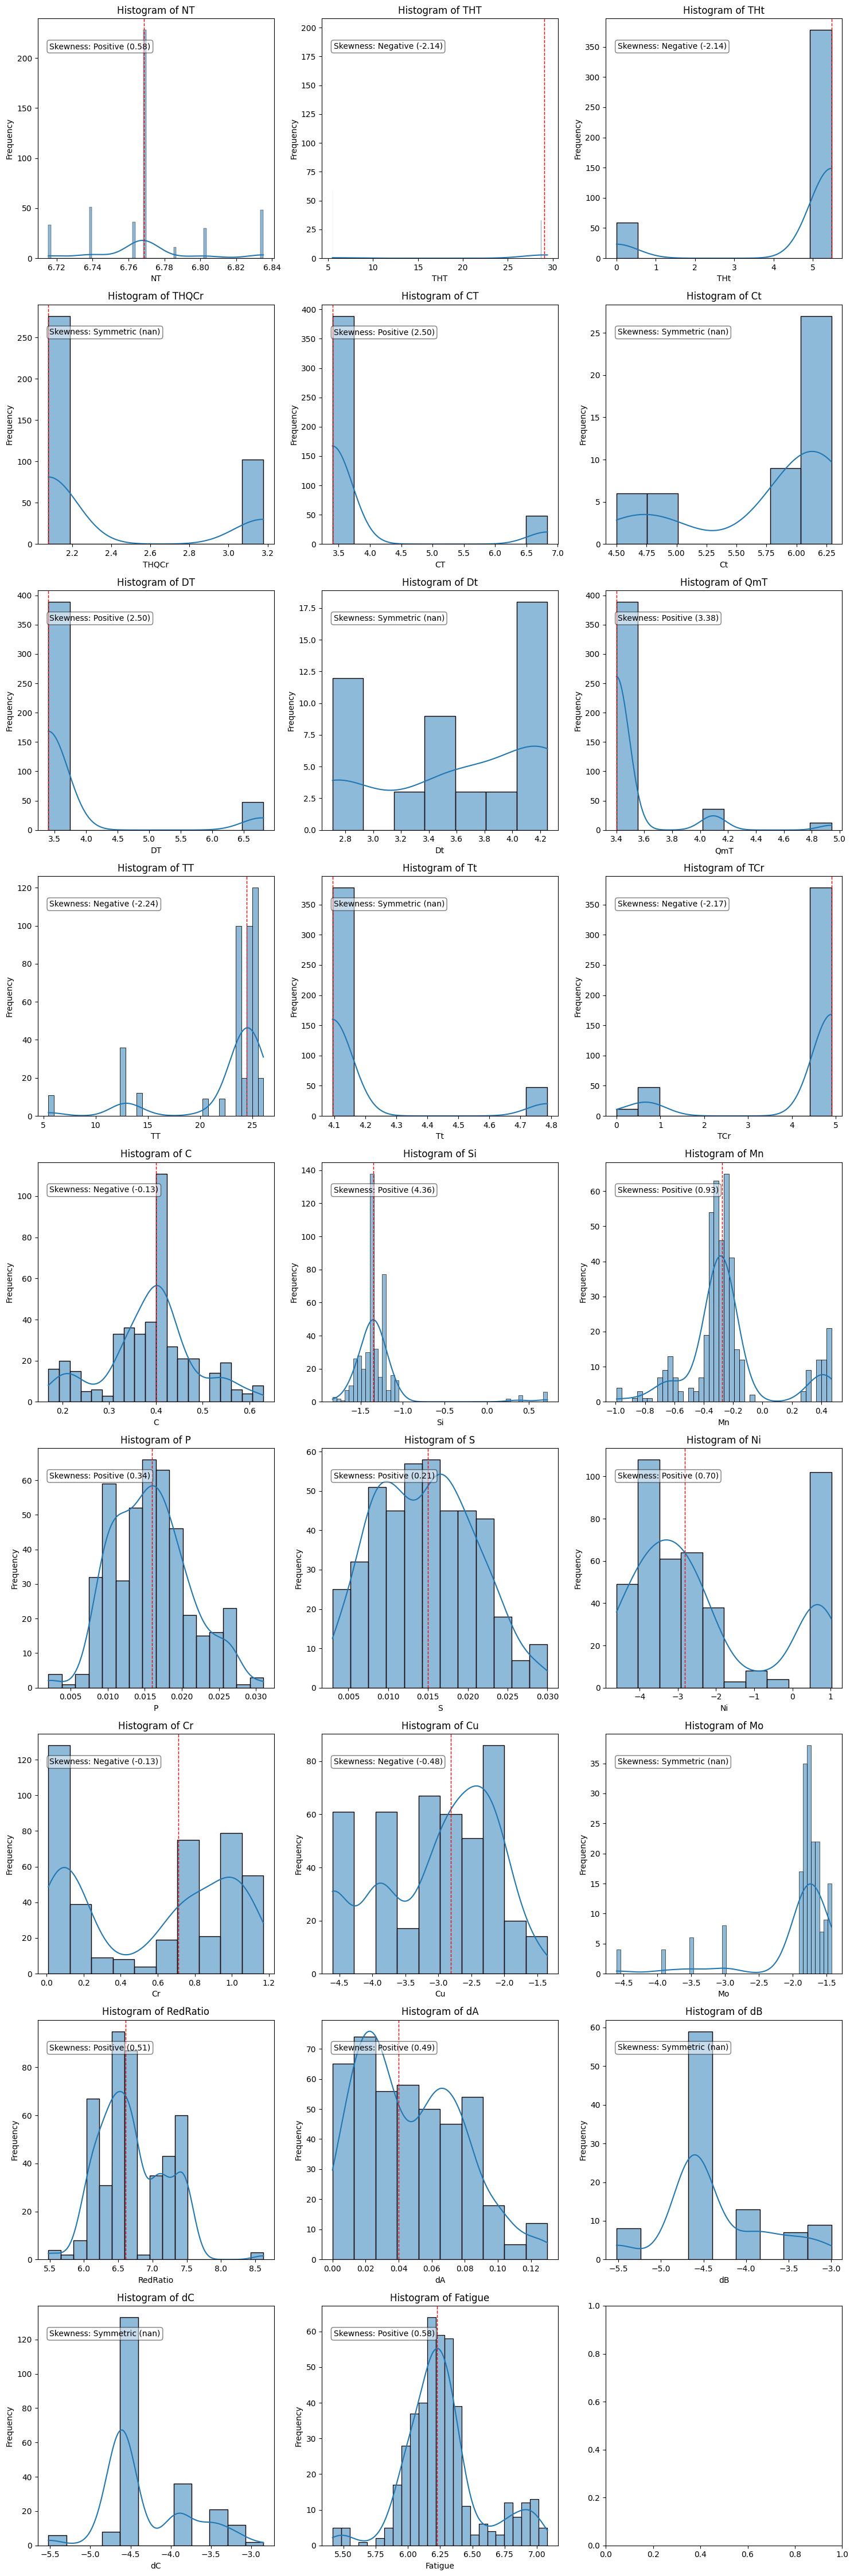

In [76]:
plot_histograms(df_n)


Achieving normality in a dataset can be crucial for certain statistical analyses and modeling techniques. There are several methods to transform data to approximate a normal distribution. Here are some common techniques along with the mathematics and logic behind them:

Logarithmic Transformation:
Mathematics:
�
=
log
⁡
(
�
)
y=log(x) where
�
y is the transformed variable and
�
x is the original variable.
Logic: Logarithmic transformations are useful for reducing skewness in right-skewed distributions. Since the logarithm function compresses larger values more than smaller ones, it can help spread out the data and make it more symmetric.
Square Root Transformation:
Mathematics:
�
=
�
y=
x
​
  where
�
y is the transformed variable and
�
x is the original variable.
Logic: Similar to logarithmic transformation, square root transformation is effective for reducing right skewness. It compresses larger values more than smaller ones, resulting in a more symmetric distribution.
Box-Cox Transformation:
Mathematics:
If
�
λ is not equal to 0:
�
=
�
�
−
1
�
y=
λ
x
λ
 −1
​

If
�
λ is equal to 0:
�
=
log
⁡
(
�
)
y=log(x)
Logic: The Box-Cox transformation is a family of power transformations that includes logarithmic transformation (
�
=
0
λ=0) and square root transformation (
�
=
0.5
λ=0.5) as special cases. By selecting an appropriate value of
�
λ, the Box-Cox transformation aims to stabilize the variance and make the data more normally distributed.
Yeo-Johnson Transformation:
Mathematics: Similar to the Box-Cox transformation but allows for negative and zero values by adding a shift parameter.
Logic: The Yeo-Johnson transformation extends the Box-Cox transformation to handle a wider range of data distributions. It can be useful when dealing with datasets that contain zero or negative values.
Rank Transformation:
Mathematics: Assign ranks to the data values and then transform the ranks to follow a standard normal distribution using the inverse of the cumulative distribution function of the normal distribution (also known as the probit function).
Logic: Rank transformation converts the data into ranks, which reduces the impact of outliers and skewness. By transforming the ranks to follow a standard normal distribution, this method achieves normality without making assumptions about the original data distribution.
Johnson Transformation:
Mathematics: A four-parameter family of transformations that includes logarithmic, exponential, and power transformations. The parameters are estimated from the data to achieve the best fit to a normal distribution.
Logic: The Johnson transformation is a flexible approach that can handle a wide range of data distributions. It iteratively estimates the transformation parameters to maximize the normality of the transformed data.
Each of these transformation methods has its own mathematical formulation and rationale behind its use. The choice of transformation depends on the characteristics of the data and the assumptions of the analysis or modeling technique being applied. It's essential to assess the effectiveness of each transformation method and select the one that best suits the specific requirements of the analysis.

#Multicolinearity

##First of all we will know through how many ways we can detect the multi colinearity.

##Correlation Matrix: Calculate the correlation matrix of the independent variables (features). High correlation coefficients (close to 1 or -1) between pairs of variables indicate potential multicollinearity.

##Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. VIF values greater than 5 or 10 are often considered indicative of multicollinearity.

##Eigenvalues: Compute the eigenvalues of the correlation matrix. If you have one or more small eigenvalues close to zero, it indicates the presence of multicollinearity.

##Condition Number: Calculate the condition number, which is the ratio of the largest eigenvalue to the smallest eigenvalue of the correlation matrix. A condition number greater than 30 suggests multicollinearity.

##Tolerance: Calculate the tolerance for each independent variable. Tolerance is the proportion of variance in a predictor variable that is not explained by the other predictors. A tolerance value close to 0 indicates multicollinearity.

##Visual Inspection: Scatterplot matrices or pair plots can provide a visual representation of the relationships between variables, helping to identify multicollinearity.

##Regression Coefficients: Examine the coefficients of the regression model. If coefficients are not consistent with theory or change dramatically when adding or removing variables, it may indicate multicollinearity.

##Principal Component Analysis (PCA): Perform PCA on the independent variables and examine the explained variance ratio. A few principal components explaining most of the variance suggest multicollinearity.

##Residual Analysis: Check the residuals of the regression model for patterns or unusual behavior. Multicollinearity can affect the stability of parameter estimates and lead to unusual residuals.

#Method_1 correlation Matrix.

#This method works on pearson correlation formula

In [28]:
correlation=df.corr()

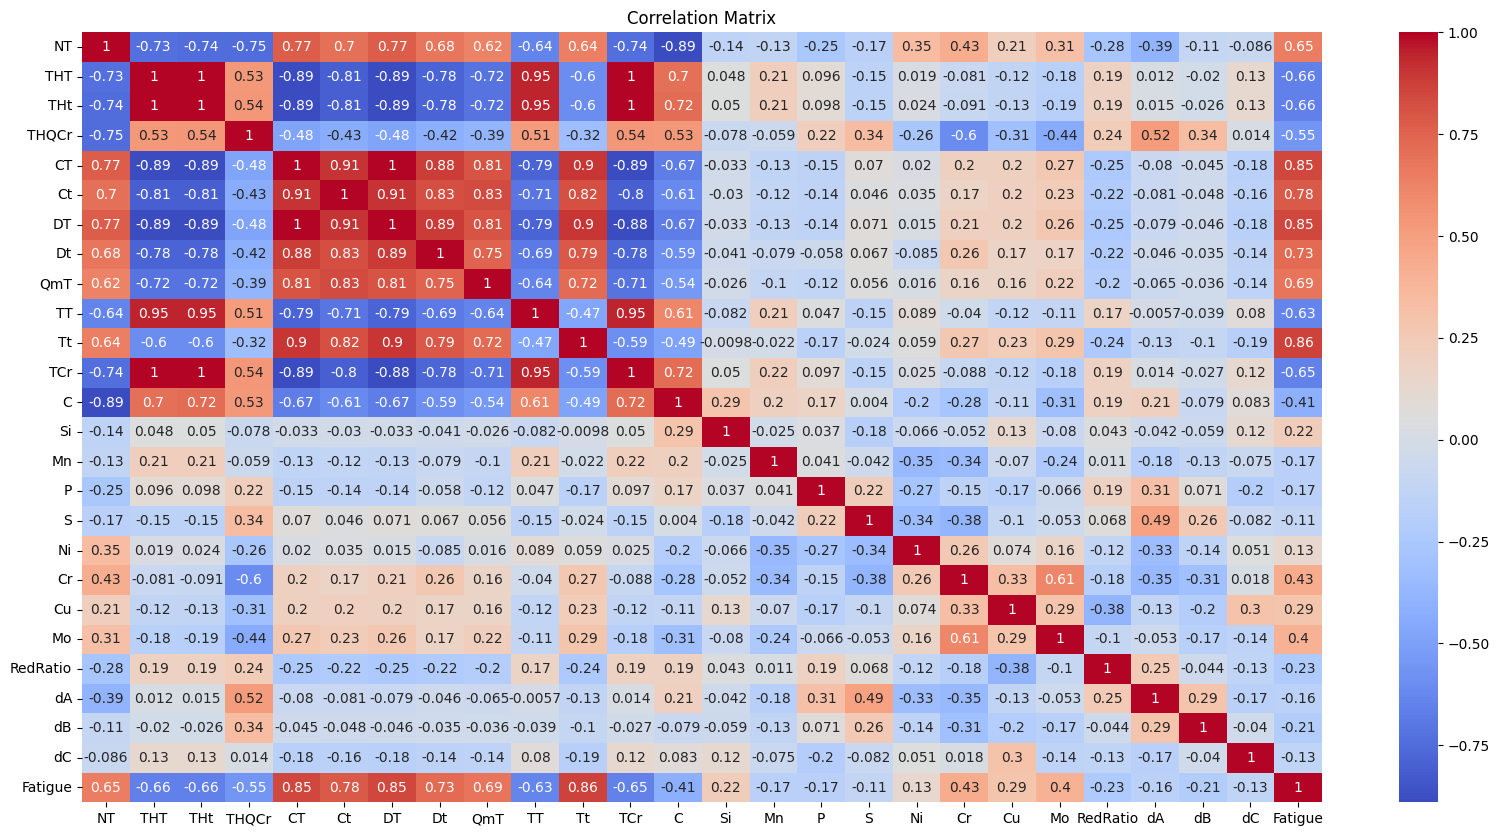

In [34]:
plt.figure(plt.figure(figsize=(20,10)))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
#Finding out the Pair of features which are highly correlated
def correlated_feature_pair_finder(df,threashold=0.7):
  correlation_matrix=df.corr()
  correlated_pairs=[]
  for i in range (len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)):
      if abs(correlation_matrix.iloc[i,j])>threashold:
        pairs=(correlation_matrix.columns[i],correlation_matrix.columns[j])
        correlated_pairs.append(pairs)
  return correlated_pairs

In [36]:
correlated_feature_pair_finder(df)

[('NT', 'THT'),
 ('NT', 'THt'),
 ('NT', 'THQCr'),
 ('NT', 'CT'),
 ('NT', 'Ct'),
 ('NT', 'DT'),
 ('NT', 'TCr'),
 ('NT', 'C'),
 ('THT', 'THt'),
 ('THT', 'CT'),
 ('THT', 'Ct'),
 ('THT', 'DT'),
 ('THT', 'Dt'),
 ('THT', 'QmT'),
 ('THT', 'TT'),
 ('THT', 'TCr'),
 ('THT', 'C'),
 ('THt', 'CT'),
 ('THt', 'Ct'),
 ('THt', 'DT'),
 ('THt', 'Dt'),
 ('THt', 'QmT'),
 ('THt', 'TT'),
 ('THt', 'TCr'),
 ('THt', 'C'),
 ('CT', 'Ct'),
 ('CT', 'DT'),
 ('CT', 'Dt'),
 ('CT', 'QmT'),
 ('CT', 'TT'),
 ('CT', 'Tt'),
 ('CT', 'TCr'),
 ('CT', 'Fatigue'),
 ('Ct', 'DT'),
 ('Ct', 'Dt'),
 ('Ct', 'QmT'),
 ('Ct', 'TT'),
 ('Ct', 'Tt'),
 ('Ct', 'TCr'),
 ('Ct', 'Fatigue'),
 ('DT', 'Dt'),
 ('DT', 'QmT'),
 ('DT', 'TT'),
 ('DT', 'Tt'),
 ('DT', 'TCr'),
 ('DT', 'Fatigue'),
 ('Dt', 'QmT'),
 ('Dt', 'Tt'),
 ('Dt', 'TCr'),
 ('Dt', 'Fatigue'),
 ('QmT', 'Tt'),
 ('QmT', 'TCr'),
 ('TT', 'TCr'),
 ('Tt', 'Fatigue'),
 ('TCr', 'C')]

#Method_2 Variance threashold

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each independent variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical independent variables.

    Returns:
    DataFrame: DataFrame containing VIF values for each independent variable.
    """
    # Create a DataFrame to store the VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data

In [39]:
calculate_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,NT,7.452070e+01
1,THT,5.830393e+03
2,THt,inf
3,THQCr,3.545056e+01
4,CT,9.141562e+06
5,Ct,7.941285e+00
6,DT,4.753179e+03
7,Dt,1.544005e+01
8,QmT,3.498713e+00
9,TT,3.891627e+01


Interpretation:
VIF = 1: No multicollinearity. The variance of the coefficient estimate is not inflated.
VIF between 1 and 5: Moderate multicollinearity. The variance of the coefficient estimate is moderately inflated.
VIF greater than 5: High multicollinearity. The variance of the coefficient estimate is significantly inflated.

#Method-3 Visual Inspection Pair Plot

In [ ]:
sns.pairplot(df)
plt.show()

#Multicollinearity can be treated or mitigated using various techniques. Here are some common approaches:

##Feature Selection: Remove one or more correlated variables from the model. This can be done based on domain knowledge, variable importance measures, or by using automated feature selection methods such as forward/backward selection, LASSO regression, or recursive feature elimination.

##Principal Component Analysis (PCA): Transform the original variables into a smaller set of uncorrelated variables (principal components) that capture most of the variability in the data. PCA can help reduce multicollinearity by creating orthogonal components, but it may make the interpretation of the model more complex.

##Partial Least Squares (PLS): PLS regression is similar to PCA but is designed specifically for regression problems. It constructs a set of orthogonal factors that explain the maximum covariance between the predictors and the response variable. PLS can be used to reduce multicollinearity while preserving predictive power.

##Regularization Techniques: Techniques like Ridge Regression and LASSO Regression add a penalty term to the regression model, which helps to shrink the coefficients of correlated variables towards zero. Ridge Regression penalizes the squared magnitude of coefficients, while LASSO Regression penalizes the absolute magnitude. These methods can effectively reduce multicollinearity and improve model performance.

##Combining Variables: Create new variables by combining or aggregating correlated variables. For example, instead of including both "number of bedrooms" and "number of bathrooms" separately in a model, you could create a new variable representing the total number of rooms.

##Data Collection: Collect more data to increase the sample size. Increasing the sample size can sometimes help mitigate multicollinearity by providing more information about the relationships between variables.

##Model Comparison: Compare the performance of models with and without correlated variables using techniques like cross-validation or information criteria (e.g., AIC, BIC). Select the model that achieves the best balance between simplicity and predictive accuracy.

##Reasons Not to Cure Multicollinearity:
Natural Relationships: Multicollinearity may arise naturally in the dataset due to inherent relationships between variables in the steel recipe. For example, certain alloying elements or processing parameters may co-occur in specific types of steel compositions or manufacturing processes. In such cases, multicollinearity may not necessarily indicate a problem with the model.
Predictive Performance: Multicollinearity may not significantly impact the predictive performance of the model, especially if the primary goal is to accurately predict the strength of steel rather than to infer individual variable effects. Modern machine learning algorithms are often robust to multicollinearity and can effectively handle correlated predictors.

#Feature Selection

#Mutual Information Gain.

In [42]:
from sklearn.feature_selection import mutual_info_regression

In [44]:
x=df.drop('Fatigue',axis=1)
y=df['Fatigue']

In [49]:
mutual_info_regression_results=mutual_info_regression(x,y)

In [46]:
mutual_info_regression_results

array([0.84045754, 0.6286932 , 0.39229849, 0.589594  , 0.3186897 ,
       0.31834054, 0.32440477, 0.32935639, 0.31562573, 0.97631989,
       0.44601827, 0.42509996, 0.51125199, 0.10415346, 0.27205486,
       0.10157037, 0.1044185 , 0.3080459 , 0.64725295, 0.18972776,
       0.4007734 , 0.26668595, 0.24871326, 0.18150076, 0.07778482])

In [54]:
def plot_mutual_info(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate mutual information scores
    mi_scores = mutual_info_regression(x, y)

    # Sort features based on mutual information scores
    sorted_indices = np.argsort(mi_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_mi_scores = [mi_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_mi_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Mutual Information Gain')
    plt.ylabel('Features')
    plt.title('Mutual Information Gain for Features')
    plt.show()

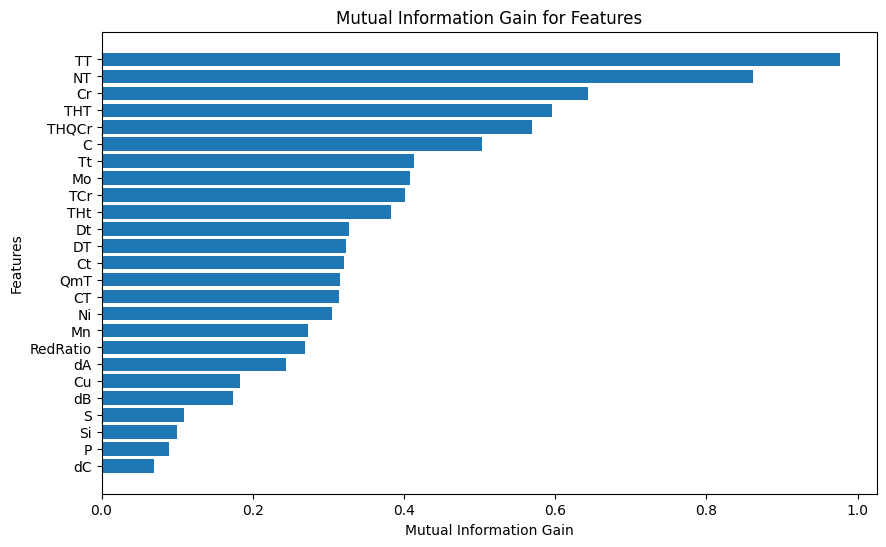

In [55]:
plot_mutual_info(x, y)

#2.F-regression

In [59]:
from sklearn.feature_selection import f_regression
def plot_f_test(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate F-statistic and p-values
    f_scores, p_values = f_regression(x, y)

    # Sort features based on F-statistic
    sorted_indices = np.argsort(f_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_f_scores = [f_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_f_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('F-Statistic')
    plt.ylabel('Features')
    plt.title('F-Statistic for Numerical Features')
    plt.show()

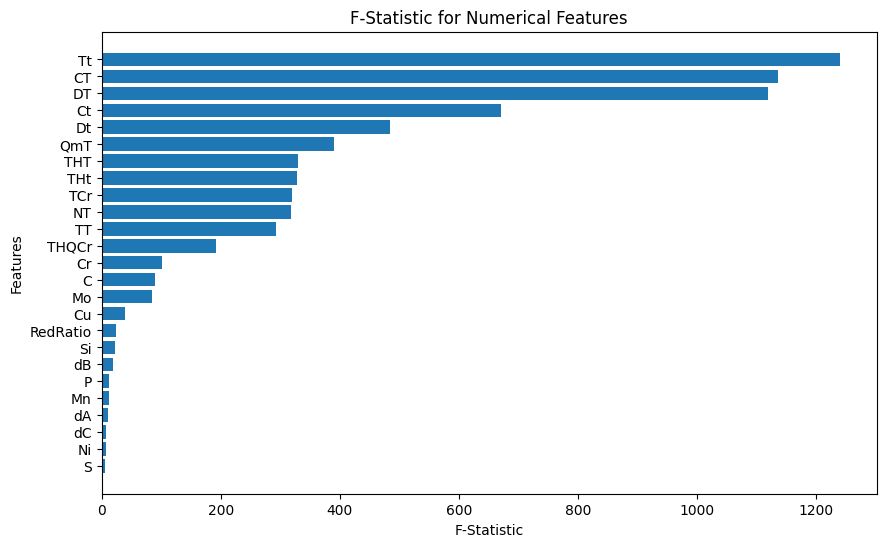

In [60]:
plot_f_test(x, y)

#3.Chi-square

In [61]:
from sklearn.feature_selection import chi2

def plot_chi2(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate chi-squared statistic and p-values
    chi2_scores, p_values = chi2(x, y)

    # Sort features based on chi-squared scores
    sorted_indices = np.argsort(chi2_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_chi2_scores = [chi2_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_chi2_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Chi-Squared Statistic')
    plt.ylabel('Features')
    plt.title('Chi-Squared Statistic for Categorical Features')
    plt.show()

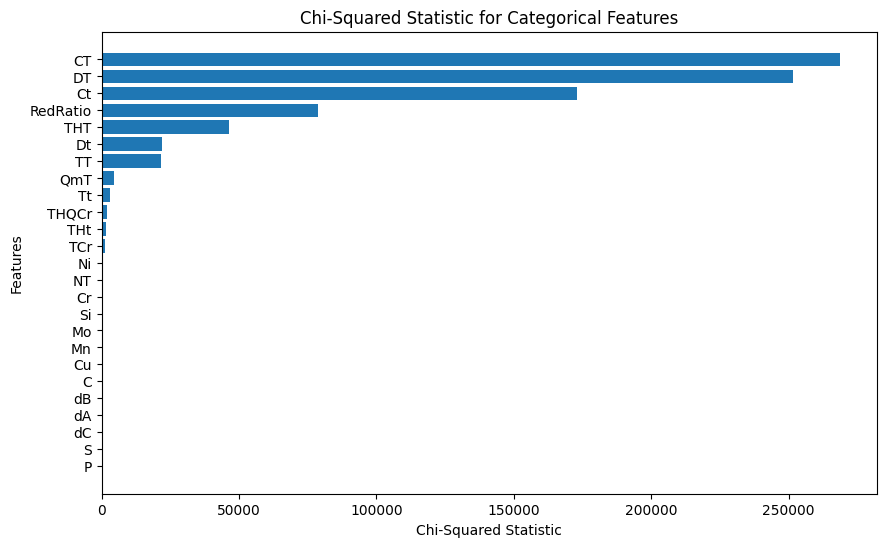

In [62]:
plot_chi2(x, y)

#Recursive feature elimination

In [63]:
# Define the estimator (Linear Regression)
estimator = LinearRegression()

In [65]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector
def rfe_feature_selection(estimator, x, y, n_features_to_select):
    rfe = RFE(estimator, n_features_to_select= n_features_to_select)
    rfe.fit(x, y)
    selected_features = x.columns[rfe.support_]
    return selected_features

In [66]:
rfe_feature_selection(estimator, x, y,10)

Index(['C', 'Si', 'P', 'S', 'Cr', 'Cu', 'Mo', 'dA', 'dB', 'dC'], dtype='object')